In [1]:
!pip install pymongo

In [2]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [3]:
!pip install scikit-surprise

In [4]:
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix
from surprise import BaselineOnly, SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import KNNBasic, KNNWithMeans, NMF
from sklearn.neighbors import KNeighborsRegressor
from surprise.model_selection import GridSearchCV
import time


In [5]:
import nltk
import spacy

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
!python -m spacy download fr_core_news_sm

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     -- ------------------------------------- 1.0/16.3 MB 5.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/16.3 MB 7.6 MB/s eta 0:00:02
     ----------- ---------------------------- 4.7/16.3 MB 8.4 MB/s eta 0:00:02
     ---------------- ----------------------- 6.8/16.3 MB 8.9 MB/s eta 0:00:02
     ---------------------- ----------------- 9.2/16.3 MB 9.4 MB/s eta 0:00:01
     ---------------------------- ----------- 11.5/16.3 MB 9.8 MB/s eta 0:00:01
     ---------------------------------- ----- 13.9/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  16.3/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 16.3/16.3 MB 9.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [9]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

In [202]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de données avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")


Longeur de chaque table de données avis: 246524, jeux: 20235, infos: 532, details : 20234


In [235]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

In [236]:
pdAvis = pd.DataFrame(avis)
print("\nAvis:\n", pdAvis.describe())


Avis:
                note
count  246524.00000
mean        7.59307
std         2.12589
min         0.00000
25%         6.00000
50%         8.00000
75%         9.40000
max        10.00000


In [237]:
pdAvis.head()

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,63c6726ea81f3e3016af9a59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l..."


In [238]:
print(pdAvis.loc[0, "comment"])  # Affiche le premier commentaire

Lorsque le jeu est jeu, bon, réflexif, joli pour qui est sensible à ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au détour des règles, on s'intéresse également au propos et à la sensibilisation, légère comme les ailes du dit-papillons et pourtant aussi bien amené, alors effectivement, il y a là un très bon jeu, ludiquement parlant (et il est possible de s'arrêter là) mais également très bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous entoure... Ça, c'est deux fois bon !


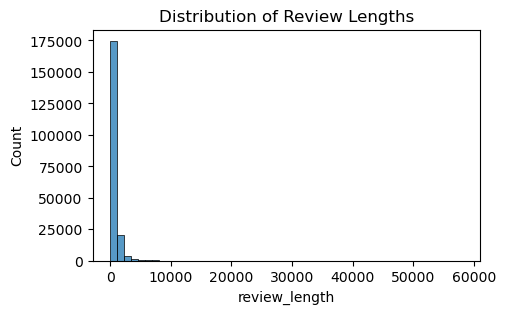

Average review length: 619 characters


In [239]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

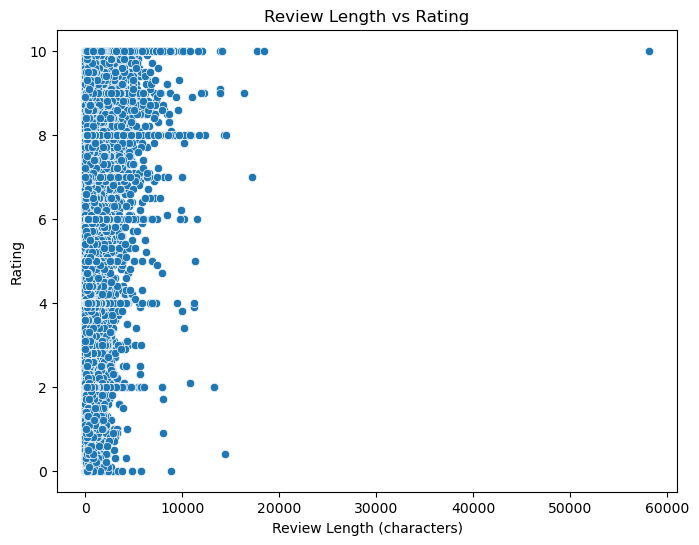

In [240]:
# Analyze if review length correlates with rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

In [241]:
#2 reviews with around 60000 words that arent interesting to keep (they are spam)
pdAvis[pdAvis["review_length"] >50000]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0


In [242]:
pdAvis[pdAvis["author"]== "The Lonesome Meeple"]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
21474,63c67500993b727dc2a7a0d7,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
84272,63c67799993b727dc2a89625,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0


In [243]:
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246524, 11)


In [244]:
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (246522, 11)


In [245]:
#enlever les doublons
pdAvis = pdAvis.copy()
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
pdAvis.drop_duplicates(subset=['author', 'date_published', 'title_review', 'note', 'review_href', 'title', 'url', 'treated', 'comment' , 'review_length'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246522, 11)
Dimensions de pdAvis après nettoyage : (176242, 11)


In [246]:
# Supprimer les lignes où 'comment' est NaN ou vide
pdAvis.dropna(subset=['comment'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (150723, 11)


In [247]:
# Optionnel : enlever aussi les commentaires vides (juste espaces)
pdAvis = pdAvis[pdAvis['comment'].str.strip() != ""]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (142845, 11)


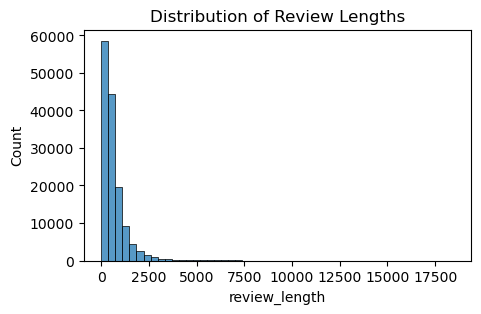

Average review length: 640 characters


In [248]:
#We redid the statistcs about the review length to verify, all is good,the highest review is real
plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

In [249]:
comment_counts = pdAvis["title"].value_counts()
print(comment_counts)


title
Shogun                                 166
Carcassonne - Die Jäger und Sammler    150
Jeu de Cochons                         148
Dune                                   148
La Città                               148
                                      ... 
Warhammer patrouilles                    1
Praetoria Prima                          1
Thalie                                   1
Jason                                    1
Liar's dice                              1
Name: count, Length: 10341, dtype: int64


In [250]:
# Filtrer les jeux avec au moins 2 commentaires --> Difficile à recommander intelligemment (trop peu d’infos)
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
game_counts = pdAvis['title'].value_counts()
valid_games = game_counts[game_counts >= 2].index
pdAvis = pdAvis[pdAvis['title'].isin(valid_games)]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (142845, 11)
Dimensions de pdAvis après nettoyage : (140157, 11)


In [251]:
lis = pdAvis["author"].value_counts()
print(len(lis[lis == 3]))

862


In [28]:
# Filtrer les utilisateurs avec au moins 3 commentaires --> On ne peut pas calculer sa similarité avec d'autres utilisateurs
#on veut que le knn soient trouve des voisins reellement similaires
#print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
#user_counts = pdAvis['author'].value_counts()
#valid_users = user_counts[user_counts >= 2].index
#pdAvis = pdAvis[pdAvis['author'].isin(valid_users)]
#print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (140157, 11)
Dimensions de pdAvis après nettoyage : (135605, 11)


In [32]:
df_notes_basses = pdAvis[pdAvis["note"] <= 6]  # Filtrer les notes ≤ 6
# Afficher quelques commentaires négatifs
print(df_notes_basses[["note", "comment_clean"]].head(10))

     note                                      comment_clean
13    6.0  déçu Mariposas \n tendance Wingspan auteur pou...
17    3.0  bel promesse papier jeu final beaucoup déçu si...
36    6.0  cause you don' need anything \n\n mysterium ai...
53    1.0  jeu magnifiquement boîte logement bien concevo...
57    6.0  bien neuf clair lune \n mise place jeu intéres...
78    6.0  déçu jeu avis bon lancer meeple amusant mécani...
103   2.0  jeu Not jeu 3 4 vraiment intéressant extension...
119   5.0  bonbon ludique   bel impatiemment   coup buzz ...
137   5.0  hasard tirage clone faille cher deckbuilding t...
205   5.0  grand fan Troyes amateur Roll Write bien sûr t...


**meme chose que dans l'autre fichier de la partie 1**

In [36]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix



###################################################################################################



def minipingpong(sparse_matrix, allusers, allgames, min_ratings_users, min_ratings_games, max_iterations=10, plot=True):
    matrix = sparse_matrix.tocoo()
    users = np.array(allusers)
    games = np.array(allgames)
    iteration = 0
    while iteration < max_iterations:
        game_ratings = np.bincount(matrix.col, minlength=len(games))
        user_ratings = np.bincount(matrix.row, minlength=len(users))

        valid_games = np.where(game_ratings >= min_ratings_games)[0]

        valid_users = np.where(user_ratings >= min_ratings_users)[0]

        keep = np.isin(matrix.row, valid_users) & np.isin(matrix.col, valid_games)

        new_row = matrix.row[keep]
        new_col = matrix.col[keep]
        new_data = matrix.data[keep]

        # Update row and column indices to match new dimensions
        row_mapping = {old: new for new, old in enumerate(valid_users)}
        col_mapping = {old: new for new, old in enumerate(valid_games)}

        new_row = np.array([row_mapping[r] for r in new_row])
        new_col = np.array([col_mapping[c] for c in new_col])

        # Create the new matrix
        matrix = csr_matrix((new_data, (new_row, new_col)),
                           shape=(len(valid_users), len(valid_games)))
        # Convert back to COO for next iteration
        matrix = matrix.tocoo()

        # Update user and game lists
        users = users[valid_users]
        games = games[valid_games]
        iteration += 1

    final_matrix = matrix.tocsr()

    return final_matrix

###################################################################################################


def subtract_mean(cleaned_matrix):
    data_array = cleaned_matrix.toarray()

    user_means = []
    for i in range(data_array.shape[0]):
        user_ratings = data_array[i, :]
        non_zero_indices = user_ratings != 0
        user_ratings_non_zero = user_ratings[non_zero_indices]

        if len(user_ratings_non_zero) > 0:
            user_means.append(user_ratings_non_zero.mean())
        else:
            user_means.append(0)

    # Create a new matrix with normalized ratings
    normalized_data = []
    normalized_rows = []
    normalized_cols = []

    cleaned_matrix_coo = cleaned_matrix.tocoo()
    # For each non-zero entry in the original matrix, subtract user mean
    for i, j, v in zip(cleaned_matrix_coo.row, cleaned_matrix_coo.col, cleaned_matrix_coo.data):
        normalized_value = v - user_means[i]
        normalized_data.append(normalized_value)
        normalized_rows.append(i)
        normalized_cols.append(j)

    # Create new sparse matrix with normalized values
    normalized_matrix = csr_matrix(
        (normalized_data, (normalized_rows, normalized_cols)),
        shape=cleaned_matrix.shape
    )
    return normalized_matrix


###################################################################################################

def custom_train_test_split(sparse_matrix, test_size=0.2, max_user_loss=0.5, max_game_loss=0.5):

    np.random.seed(42)

    coo_matrix = sparse_matrix.tocoo()

    # Total number of ratings
    n_ratings = coo_matrix.data.size
    n_users = sparse_matrix.shape[0]
    n_games = sparse_matrix.shape[1]

    # Count ratings per user and per game
    user_ratings = np.bincount(coo_matrix.row, minlength=n_users)
    game_ratings = np.bincount(coo_matrix.col, minlength=n_games)

    # Calculate maximum allowed test ratings per user and game
    max_test_per_user = np.floor(user_ratings * max_user_loss).astype(int)
    max_test_per_game = np.floor(game_ratings * max_game_loss).astype(int)

    # Initialize counters for test ratings per user and game
    test_per_user = np.zeros(n_users, dtype=int)
    test_per_game = np.zeros(n_games, dtype=int)

    # Create a random permutation of rating indices
    rating_indices = np.random.permutation(n_ratings)

    # Initialize train and test masks
    train_mask = np.ones(n_ratings, dtype=bool)
    test_mask = np.zeros(n_ratings, dtype=bool)

    # Target number of test ratings
    n_test_target = int(test_size * n_ratings)
    n_test_selected = 0

    # Iterate through ratings in random order
    for idx in rating_indices:
        user = coo_matrix.row[idx]
        game = coo_matrix.col[idx]

        # Check if we can add this rating to test set without violating constraints
        if (test_per_user[user] < max_test_per_user[user] and
            test_per_game[game] < max_test_per_game[game] and
            n_test_selected < n_test_target):

            # Add to test set
            train_mask[idx] = False
            test_mask[idx] = True

            # Update counters
            test_per_user[user] += 1
            test_per_game[game] += 1
            n_test_selected += 1

    # Create train and test matrices
    train_matrix = csr_matrix(
        (coo_matrix.data[train_mask],
         (coo_matrix.row[train_mask], coo_matrix.col[train_mask])),
        shape=sparse_matrix.shape
    )

    test_matrix = csr_matrix(
        (coo_matrix.data[test_mask],
         (coo_matrix.row[test_mask], coo_matrix.col[test_mask])),
        shape=sparse_matrix.shape
    )

    # Print statistics
    print(f"Split complete: {n_test_selected} ratings ({n_test_selected/n_ratings:.2%}) in test set")
    print(f"Train set: {train_matrix.nnz} ratings, Test set: {test_matrix.nnz} ratings")

    # Check if any users or games lost too many ratings
    users_with_ratings = np.where(user_ratings > 0)[0]
    games_with_ratings = np.where(game_ratings > 0)[0]

    max_user_loss_actual = np.max(test_per_user[users_with_ratings] / user_ratings[users_with_ratings])
    max_game_loss_actual = np.max(test_per_game[games_with_ratings] / game_ratings[games_with_ratings])

    print(f"Maximum user ratings loss: {max_user_loss_actual:.2%}")
    print(f"Maximum game ratings loss: {max_game_loss_actual:.2%}")

    return train_matrix, test_matrix, train_mask, test_mask

##################################################################################################################################################################

#Baseline models


# Model 1: Global Mean Baseline
def global_mean_baseline(train_matrix,test_matrix):
    """Simplest baseline: predict global mean rating for all users and items"""
    global_mean = train_matrix.data.mean()
    test_rows, test_cols = test_matrix.nonzero()

    # For evaluating on test data
    predictions = np.full_like(test_matrix.data, global_mean)

    rmse = np.sqrt(mean_squared_error(predictions, test_matrix.data))
    mae = mean_absolute_error(predictions, test_matrix.data)
    r2 = r2_score(predictions, test_matrix.data)

    print(f"Global Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return global_mean, rmse, mae , r2


# Model 2: User Mean Baseline
def user_mean_baseline(train_matrix, test_matrix):
    # Get user means from training data
    n_users = train_matrix.shape[0]
    test_rows, test_cols = test_matrix.nonzero()

    # Calculate mean rating for each user (row)
    user_means = np.zeros(n_users)
    for u in range(n_users):
        row = train_matrix.getrow(u)
        if row.nnz > 0:  # If user has any ratings
            user_means[u] = row.data.mean()

    # Make sure test_rows values are within bounds
    valid_indices = [i for i, row in enumerate(test_rows) if row < n_users]

    if len(valid_indices) < len(test_rows):
        print(f"Warning: {len(test_rows) - len(valid_indices)} test entries had out-of-bounds user indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([user_means[row] for row in test_rows_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions,test_data_valid )

    print(f"User Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return user_means, rmse, mae, r2

# Model 3: Game Mean Baseline
def item_mean_baseline(train_matrix, test_matrix):
    # Calculate mean rating for each item/game (column)
    n_items = train_matrix.shape[1]
    item_means = np.zeros(n_items)
    test_rows, test_cols = test_matrix.nonzero()

    # Get mean of each column (item), accounting for sparsity
    for i in range(n_items):
        col = train_matrix.getcol(i)
        if col.nnz > 0:  # If item has any ratings
            item_means[i] = col.data.mean()

    # Make sure test_cols values are within bounds
    valid_indices = [i for i, col in enumerate(test_cols) if col < n_items]

    if len(valid_indices) < len(test_cols):
        print(f"Warning: {len(test_cols) - len(valid_indices)} test entries had out-of-bounds item indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([item_means[col] for col in test_cols_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions, test_data_valid)

    print(f"Item Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return item_means, rmse, mae, r2

In [37]:
pdAvis['review_length'] = pdAvis['comment'].str.len()
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]

#Duplicates removable
pdAvis.drop_duplicates(subset=['author','title_review','note','title','comment'], inplace=True)
pdJeux.drop_duplicates(subset=['title',	'href','avis'], inplace=True)


allgames = sorted(pdJeux["title"].unique())
allusers = sorted(pdAvis['author'].unique())


# Création de la dataFrame
ratings_matrix = pd.DataFrame(
    index=allusers,
    columns=allgames,
    dtype=float
)

# Remplissage de la matrice avec les notes
for _, row in pdAvis.iterrows():
    ratings_matrix.at[row['author'], row['title']] = row['note']

# Conversion en matrice sparse
mask = ~ratings_matrix.isna()
sparse_ratings_matrix = csr_matrix(
    (
        ratings_matrix.values[mask],
        np.where(mask)
    ),
    shape=ratings_matrix.shape
)

# Remove users and games with with low numbers of ratings the optimal value found was (14,18)
cleaned_matrix = minipingpong(sparse_ratings_matrix, allusers, allgames, 14, 18)

In [38]:
# Convert the cleaned_matrix data to Surprise format
ratings_list = []
for i, j in zip(*cleaned_matrix.nonzero()):
    user = allusers[i]
    game = allgames[j]
    rating = cleaned_matrix[i, j]
    ratings_list.append((user, game, rating))


ratings_df = pd.DataFrame(ratings_list, columns=['userID', 'itemID', 'rating'])

# Define the reader with appropriate rating scale
reader = Reader(rating_scale=(0, 10))

# Create a Surprise dataset
data = Dataset.load_from_df(ratings_df, reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)



knn_basic = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True}) # After testing 40 was the best k neighbors found
knn_means = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})


knn_basic.fit(trainset)
knn_means.fit(trainset)


preds_basic = knn_basic.test(testset)
preds_means = knn_means.test(testset)

rmse_knn_basic = accuracy.rmse(preds_basic)
mae_knn_basic = accuracy.mae(preds_basic)
rmse_knn_means = accuracy.rmse(preds_means)
mae_knn_means = accuracy.mae(preds_means)
y_true = [pred.r_ui for pred in preds_basic]
y_pred_basic = [pred.est for pred in preds_basic]
y_pred_means = [pred.est for pred in preds_means]
r2_knn_basic = r2_score(y_true, y_pred_basic)
r2_knn_means = r2_score(y_true, y_pred_means)


knn_results = pd.DataFrame({
    'Model': ['KNNBasic (Suprise)', 'KNNWithMeans (Suprise)'],
    'RMSE': [rmse_knn_basic, rmse_knn_means],
    'MAE': [mae_knn_basic, mae_knn_means],
    'R2 score': [r2_knn_basic, r2_knn_means]
})

# Combine with previous results
results = knn_results

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.9802
MAE:  1.5614
RMSE: 1.9047
MAE:  1.4755


**j'ai fait juste cette fonction pour retourner les top predictions pour chaque utilisateurs (on pourrait juste ajouter cette fonction dans l'autre fichier de la partie knn**

In [71]:
def get_top_n_predictions(predictions, n=10):
    """
    Return the top-N recommended items for each user from a set of predictions.
    """

    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the N highest ones.
    #on trie les items recommandés par note prédite (la plus élevée en premier) et on garde les n premiers jeux.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [125]:
top_n = get_top_n_predictions(preds_means, n=5)

In [126]:
# Print the recommended items for the first couple of users
first_couple_users = list(top_n.keys())[:20]  # Adjust the number to select the first N users

for uid in first_couple_users:
    user_ratings = top_n[uid]
    print(f"Recommendations for user {uid}: {[iid for (iid, _) in user_ratings]}")

Recommendations for user Bloublou: ['Aladdin et le tapis volant', 'ASL : Starter Kit  #3', 'Antagon', 'Apache']
Recommendations for user GrayVice: ['Aladin', 'Bataille corse', 'Austerlitz 1805 - Partie Sud', 'Batameuh', 'Babylon 5 Component Game System : Core Sets']
Recommendations for user Dedal: ["Batt'l Kha'os", 'A Touch of Evil : The Allies', 'Bataflash', 'Battletech Technical Readout 3050', 'Battle-cry']
Recommendations for user Amarante: ['Atlantis Rising', 'A4', 'Banking', 'Age of Steam : Expansions France & Italy', 'Atlanteon']
Recommendations for user Geoff: ['Airpoly', 'African Queen', 'Banana Jump', '7 Fallen', 'Badaboum !']
Recommendations for user CCCP: ['Atlantis Rising', '7 wonders : Louis', 'Arche Extra Mix', 'Army of Darkness Card Game : Hail to the King', 'Barbarians of Lemuria']
Recommendations for user Bubu_: ['ASL : Croix de Guerre', 'ASL : Kampfgruppe Peiper II', 'Alsace', "Age of Empires III : L'âge des découvertes", 'Aspern-Essling']
Recommendations for user Gwe

# **extraire pour un jeu (Shogun) et un utilisateur (sheewi) ses voisins et leurs comentaires**

In [ ]:
def filter_comments_by_word_count(comments, min_word_count):
    """
    Filters a list of comments to include only those with a word count greater or equal to min_word_count.
    
    Args:
    comments (list of str): A list of comments.
    min_word_count (int): The minimum number of words required for a comment to be included in the return list.
    
    Returns:
    list of str: A list containing only comments that meet or exceed the word count requirement.
    """
    # Filter comments based on word count
    filtered_comments = [comment for comment in comments if len(comment.split()) >= min_word_count]
    return filtered_comments

In [ ]:
def get_top_comments(user_id, game_title, N, word_count_threshold):
    """
    Retrieves the top N comments from the nearest neighbors of a specified user about a specific game,
    using the KNNWithZScore algorithm from Surprise. Only comments with a word count above a certain threshold are considered.
    Expands the search if initial neighbors have not commented on the game. Includes the rank of each commenting user based on proximity.

    Args:
    user_id (str): The user ID of the interested user.
    game_title (str): The title of the game for which comments are being retrieved.
    N (int): The number of top comments to return based on relevance.
    word_count_threshold (int): The minimum number of words required for comments to be considered.

    Returns:
    list of tuples: A list containing tuples of (rank, author, comment) if available, or a status message.
    """
    try:
        # Retrieve inner ID of the user
        user_inner_id = trainset.to_inner_uid(user_id)
    except ValueError:
        return f"No data available for the user ID '{user_id}'."

    try:
        # Retrieve inner ID of the game
        game_inner_id = trainset.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."

    # Initialize variables for searching neighbors and tracking unique comments
    k = 20
    max_neighbors = trainset.n_users  # Maximum possible neighbors
    found_comments = []
    processed_neighbor_ids = set()  # Set to track processed neighbors

    # Retrieve neighbors and expand search until enough comments are found or all users are checked
    while len(found_comments) < N and k <= max_neighbors:
        # Retrieve the k nearest neighbors of the user
        neighbors = algo.get_neighbors(user_inner_id, k=k)
        # Convert inner IDs of the neighbors back to raw IDs and store with ranks
        neighbors_with_ranks = [(rank + 1, trainset.to_raw_uid(inner_id)) for rank, inner_id in enumerate(neighbors) if trainset.to_raw_uid(inner_id) not in processed_neighbor_ids]

        # Filter the dataset to find the neighbors who have rated the specified game
        for rank, neighbor_id in neighbors_with_ranks:
            if neighbor_id not in processed_neighbor_ids:
                processed_neighbor_ids.add(neighbor_id)
                neighbor_comments = data_cleaned[(data_cleaned['author'] == neighbor_id) & (data_cleaned['title'] == game_title)]
                # Apply enhanced word count filter
                valid_comments = filter_comments_by_word_count(neighbor_comments['comment'].tolist(), word_count_threshold)
                for comment in valid_comments:
                    found_comments.append((rank, neighbor_id, comment))

        # Increase the number of neighbors for the next iteration if necessary
        k += 20

    # If comments are found, sort them by length and return the top N
    if found_comments:
        found_comments.sort(key=lambda x: len(x[2]), reverse=True)  # Sort by comment length
        return found_comments[:N]
    else:
        return f"No comments found for the game '{game_title}' from nearest neighbors that meet the word threshold."

In [361]:
jeu = "Shogun"
utilisateur = "sheewi"

In [267]:
#from surprise.prediction_algorithms.knns import KNNWithZScore

reader = Reader(rating_scale=(1, 10))  # Assuming rating scale is from 1 to 10
dataa = Dataset.load_from_df(pdAvis[['author', 'title', 'note']], reader)
trainset2 = dataa.build_full_trainset()
knn_means = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True}, k=50, min_k=1)
knn_means.fit(trainset2)

def get_neighbors(user_name, game_title, k=50):
    # Retrieve inner ID of the user
    user_inner_id = trainset2.to_inner_uid(user_name)
    
    # Retrieve inner ID of the game
    try:
        game_inner_id = trainset2.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."
    
    # Retrieve the k nearest neighbors of the user
    neighbors = knn_means.get_neighbors(user_inner_id, k)
    # Convert inner IDs of the neighbors back to raw IDs
    neighbors_ids = [trainset2.to_raw_uid(inner_id) for inner_id in neighbors]
    print(neighbors_ids)
    # Filter the dataset to find the neighbors who have rated the specified game
    filtered_comments = pdAvis[(pdAvis['author'].isin(neighbors_ids)) & (pdAvis['title'] == game_title)]
    print("Nombre de voisins ayant commenté ce jeu :", len(filtered_comments))
    
    
    # Collect and return usernames and their comments on the specified game
    return filtered_comments[['author', 'note', 'comment']].values.tolist()

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [363]:
neighbors_comments = get_neighbors(utilisateur, jeu, k=50)

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Empédocle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John Lénine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant commenté ce jeu : 12


In [364]:
for cmt in neighbors_comments:
    print(cmt)
    print()

['PtitJu', 8.0, 'Les + :Le matériel (dont un plateau réversible)Le principe de la tourRiches des mécanismes (ordre du tour, programmation (avec connaissance des 5 premières actions jouées), résolution des combats (la tour), révolte, gestion de ses provinces, ses coffres et du riz, …)Les - : Erreurs dans la règle en françaisMise en place un peu longue (et pas sur n’importe quelle table !)Seulement 6 tours mais 2 heures quand mêmeDonc : Je préfère le hasard de la tour de Shogun aux lancers de dés d’Invasions.En tout cas, on ne voit pas le temps passer.']

['limp', 8.0, "Difficile de trancher vraiment sur ce jeu, quoi que, je m'y essaie.Shogun est un très bon jeu, c'est indéniable.Shogun n'est pas aussi compliqué qu'il y parait non plus. Pour autant, il est riche, et les choix à faire seront nombreux.Le hasard des combats est une véritable trouvaille, aussi bien dans la réalisation de la tour que dans le mécanisme lui-même. Ca permettra d'ajouter du fun et un peu de tension aux parties.On

In [256]:
pdAvis["title"].value_counts()

title
Shogun                                  166
Carcassonne - Die Jäger und Sammler     150
ARENA - Roma II                         148
La Città                                148
Jeu de Cochons                          148
                                       ... 
Kapitän Wackelpudding                     2
Dobble Beach                              2
Haut les cubes !                          2
Voldétour extension                       2
Last Night On Earth : Zombie Pillage      2
Name: count, Length: 7653, dtype: int64

In [369]:
pdAvis[(pdAvis["title"]== jeu)]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
200018,63c67f37993b727dc2aa5a47,PtitJu,2008-01-22 12:28:48,J’ai un faible pour le pays du soleil levant,8.0,https://www.trictrac.net/avis/j-ai-un-faible-p...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,Les + :Le matériel (dont un plateau réversible...,539.0
200019,63c67f37993b727dc2aa5a48,Guyomar,2007-02-13 12:28:45,Mes paysans dans ma gueule...,10.0,https://www.trictrac.net/avis/mes-paysans-dans...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'avais beaucoup apprécié Wallenstein et ce n'...,494.0
200020,63c67f37993b727dc2aa5a49,limp,2011-03-27 12:29:00,Espagne 1 Japon 0,8.0,https://www.trictrac.net/avis/espagne-1-japon-0,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Difficile de trancher vraiment sur ce jeu, quo...",1016.0
200021,63c67f37993b727dc2aa5a4a,ybkam,2007-12-08 12:28:48,Soleil d'orient,10.0,https://www.trictrac.net/avis/soleil-d-orient,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Bon, c'est une splendeur, un vrai plaisir à ch...",732.0
200022,63c67f37993b727dc2aa5a4b,Harry Cover,2010-09-17 12:28:57,Un jeu (de riz) complet !,10.0,https://www.trictrac.net/avis/un-jeu-de-riz-co...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Conquête, Combat, Développement, Programmation...",799.0
...,...,...,...,...,...,...,...,...,...,...,...
233256,63c682c8993b727dc2aadc1d,R2,2006-09-13 12:28:43,Oui mais...,6.0,https://www.trictrac.net/avis/oui-mais-43,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'aime les jeux avec du beau matériel qui débo...,1173.0
233257,63c682c8993b727dc2aadc1e,crashphil,2006-08-17 12:28:43,Un monstre très jouable,7.0,https://www.trictrac.net/avis/un-monstre-tres-...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'ai acheté cette impressionnante boîte lors d...,774.0
233258,63c682c8993b727dc2aadc1f,zapata,2006-01-30 12:28:41,Honorable étranger...,6.0,https://www.trictrac.net/avis/honorable-etranger,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Il y a 15 ans, ça me bottait bien. ces bons gr...",558.0
233259,63c682c8993b727dc2aadc20,BananeDC,2009-05-01 12:28:53,Un must ABSOLU,10.0,https://www.trictrac.net/avis/un-must-absolu-0,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,En 1986 sortait Shogun(réédité en 1995 sous le...,4812.0


In [347]:
!pip install evaluate

In [355]:
!pip install rouge_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=6708d15370dba6d596fead9ead1b9ef58031f08b59847ba4ec816a1b486782fd
  Stored in directory: c:\users\habiba\appdata\local\pip\cache\wheels\85\9d\af\01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [358]:
!pip install bert_score

In [325]:
!pip install sentence_transformers

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   -------- ------------------------------- 2.1/10.4 MB 9.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.4 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.6/10.4 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------------------- - 2.4/2.4 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.6 MB/s eta 0:00:00


# **utilisation du llm ollama : llama**

In [461]:
import requests

def ask_ollama(prompt):
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={"model": "llama3.2:latest", "prompt": prompt, "stream": False}
    )
    #print(response.json())
    return response.json()["response"]


In [470]:
def expliquer_recommandation(user_name, nom_jeu, commentaires_voisins_pos, commentaires_voisins_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de société.
    En te basant sur les commentaires positifs et negatifs d'utilisateurs proches, explique pourquoi le jeu "{nom_jeu}" pourrait plaire à l'utilisateur "{user_name}" en synthetisant :
    {"; ".join(commentaires_voisins_pos)}
    {"; ".join(commentaires_voisins_neg)}
    
    Utilise un ton naturel et convaincant, mais ne parle pas à la première personne. La réponse doit être concise et directe.
    """
    return ask_ollama(prompt)


In [483]:
def synthese_recommandation_ollama(user_name, nom_jeu, commentaires_proches_pos, commentaires_proches_neg, commentaires_lointains_pos, commentaires_lointains_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de société.
    En te basant sur les commentaires ci-dessous, explique pourquoi le jeu "{nom_jeu}" pourrait plaire à l'utilisateur "{user_name}". 
    - Les utilisateurs proches de {user_name} ayant **bien noté** le jeu (note > 6) ont dit :
    {'; '.join(commentaires_proches_pos)}
    - Les **utilisateurs proches de {user_name} ayant **mal noté** le jeu (note ≤ 6) ont dit :
    {'; '.join(commentaires_proches_neg)}
    - Les utilisateurs éloignés ayant bien noté le jeu :
    {'; '.join(commentaires_lointains_pos)}
    - Les utilisateurs éloignés ayant mal noté le jeu :
    {'; '.join(commentaires_lointains_neg)}
    
    Rédige une **explication naturelle, concise, et convaincante** en synthetisant. 
     Ne parle pas à la première personne et fait comme si tu parles à ce joueur.
    """
    #qui met l’accent sur ce que les utilisateurs proches ont aimé dans le jeu. Mentionne aussi les points de divergence.

    return ask_ollama(prompt)

In [465]:
def get_comments_voisins(user_name, game_title, k=50 , seuil=6):
    voisins_data = get_neighbors(user_name, game_title, k)
    # Extraire seulement les commentaires dont la note est au moins égale au seuil
    commentaires_pos = [comment for _, note, comment in voisins_data if note > seuil]
    # Extraire seulement les commentaires dont la note est plus petit que le seuil
    commentaires_neg = [comment for _, note, comment in voisins_data if note <= seuil]
    return commentaires_pos, commentaires_neg


In [523]:
commentaires_voisins_pos, commentaires_voisins_neg = get_comments_voisins(utilisateur, jeu, seuil = 7)
print(len(commentaires_voisins_pos))
print(len(commentaires_voisins_neg))

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Empédocle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John Lénine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant commenté ce jeu : 12
11
1


In [467]:
def get_distant_users_comments(user_name, game_title, k=50, seuil=6):
    # 1. Récupérer tous les utilisateurs
    all_users = set(pdAvis['author'].unique())
    
    # 2. Obtenir les voisins proches
    try:
        user_inner_id = trainset2.to_inner_uid(user_name)
        neighbor_inner_ids = knn_means.get_neighbors(user_inner_id, k)
        neighbors = set([trainset2.to_raw_uid(inner_id) for inner_id in neighbor_inner_ids])
    except ValueError:
        print(f"L'utilisateur {user_name} n'est pas dans le trainset.")
        return []
    
    # 3. Trouver les utilisateurs éloignés
    distant_users = all_users - neighbors - {user_name}
    
    # 4. Filtrer les commentaires de ces utilisateurs pour le jeu donné
    distant_comments = pdAvis[
        (pdAvis['author'].isin(distant_users)) &
        (pdAvis['title'] == game_title) &
        (pdAvis['comment'].notnull())
    ]

    # Positifs et negatifs comments 
    pos = distant_comments[distant_comments["note"] > seuil]
    neg = distant_comments[distant_comments["note"] <= seuil]

    poslist = pos[['author', 'note', 'comment']].values.tolist()
    neglist = neg[['author', 'note', 'comment']].values.tolist()

    poscomments = [comment for _, note, comment in poslist]
    negcomments = [comment for _, note, comment in neglist]
    
    # Retourner les commentaires triés
    return poscomments, negcomments

In [524]:
commentaires_distant_pos, commentaires_distant_neg =get_distant_users_comments(utilisateur, jeu, seuil = 6)
print(len(commentaires_distant_pos))
print(len(commentaires_distant_neg))

118
35


In [471]:
com_proche = expliquer_recommandation(utilisateur,jeu, commentaires_voisins_pos, commentaires_voisins_neg)
print(com_proche)

Shogun est un jeu de stratégie et de conquête qui reprend les mécanismes du classique Wallenstein et les transfère dans le Japon du XVIè siècle. Le jeu privilégie les jeux stratégiques et la réflexion à l'avance, plutôt que la réaction spontanée.

Les mécanismes clés du jeu incluent :

* La tour qui "innove" dans l'aléa, créant une ambiance de pression inimitable
* Des actions simultanées et d'autres dans un ordre chronologique
* Un renouveau à chaque tour avec l'ordre des bonus et des actions
* Le système de placement initial

Cependant, le jeu présente également quelques limites, notamment :

* Chaque action ne sera faite que 6 fois maximum, ce qui rend difficile la réalisation d'une stratégie globale
* Se déplacer et attaquer sont des mouvements restreints à seulement 6 fois
* Les forces qui restent dans la coupelle appartenant à un joueur peuvent être utilisées pour aider lors d'un combat

En fin de compte, Shogun est un jeu de conquête très engageant et stratégique, avec une quali

In [484]:
com_tout = synthese_recommandation_ollama(utilisateur, jeu, commentaires_voisins_pos, commentaires_voisins_neg, commentaires_distant_pos, commentaires_distant_neg)
print(com_tout)

Shogun est un jeu de stratégie qui permet aux joueurs de prendre le contrôle du Japon féodal dans les années 1500. Le jeu repose sur une mécanique de recherche technologique, d'unités diversifiées et de diplomatie pour espérer remporter la victoire.

Cependant, Shogun est marqué par une longueur excessive des parties, une répétitivité des tours et des actions, ainsi qu'un temps d'attente excessif entre les tours. Les joueurs sont condamnés à vivoter si un autre joueur prend de l'avance, ce qui peut créer une ambiance tendue et agressive.

En comparaison avec d'autres jeux similaires comme Axis & Allies, Shogun manque de saveur en raison d'une dispertion aléatoire des forces en début de partie et d'un équilibre peu optimal. Les joueurs peuvent avoir du mal à prendre parti contre les autres joueurs qui se liguent contre eux.

Malgré ces limites, Shogun est un jeu intéressant pour les amateurs de stratégie et de japonisme, et il mérite le détour pour ceux qui sont curieux d'explorer son u

In [474]:
print(pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0])

Le système de cube au lieu des dès n'est pas franchement meilleurs : les cubes lancés au début ont une plus grosse tendance à se bloquer que les suivants et ce pour le reste de la partie....


In [525]:
predictions = [com_proche]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

bleu = evaluate.load("bleu")
results_bleu= bleu.compute(predictions=predictions, references=references)

print(results_bleu)
print()

rouge = evaluate.load("rouge")
results_rouge = rouge.compute(predictions=predictions, references=references)

print(results_rouge)

{'bleu': 0.0, 'precisions': [0.10152284263959391, 0.01020408163265306, 0.005128205128205128, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 4.804878048780488, 'translation_length': 197, 'reference_length': 41}

{'rouge1': 0.18106995884773663, 'rouge2': 0.024896265560165977, 'rougeL': 0.0823045267489712, 'rougeLsum': 0.13991769547325103}


In [559]:
import evaluate

##bleue score  measures the similarity between the machine-translated text and the reference translations using n-grams
##BLEU score heavily relies on n-grams and may not capture the overall meaning or fluency of the translated text accurately.


# Define the candidate predictions and reference sentences
predictions = [com_tout]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Load the BLEU evaluation metric
bleu = evaluate.load("bleu")

# Compute the BLEU score
results_bleu= bleu.compute(predictions=predictions, references=references)

# Print the results
print(results_bleu)
print()
##ROUGE-N measures the overlap of n-grams
##ROUGE-L measures the longest common subsequence
##ROUGE-S measures the skip-bigram overlap between the candidate and reference text.
## évalue la ressemblance en surface (mots, ordre).
##ROUGE does not manage different words that have the same meaning, as it measures syntactical matches rather than semantics.

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'bleu': 0.0, 'precisions': [0.11173184357541899, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 4.365853658536586, 'translation_length': 179, 'reference_length': 41}

{'rouge1': 0.1762114537444934, 'rouge2': 0.008888888888888889, 'rougeL': 0.1145374449339207, 'rougeLsum': 0.1409691629955947}


In [560]:
##Mesure la similarité sémantique entre la prédiction et la référence, basée sur des embeddings BERT. (contextual meaning)

bertscore = evaluate.load("bertscore")
results = bertscore.compute(predictions=predictions, references=references, lang="fr")
print(results["precision"], results["recall"], results["f1"])


[0.6204641461372375] [0.6624463200569153] [0.64076828956604]


In [344]:
pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
200164,63c67f37993b727dc2aa5ad9,sheewi,2014-09-14 12:17:31,Intéressant - Bataille avec une forme d'aléatoire,7.3,https://www.trictrac.net/avis/interessant-bata...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,Le système de cube au lieu des dès n'est pas f...,190.0


# **une autre methode : word embeddings**

In [514]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Charger le modèle de Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')

##peux faire un prétraitement léger et propre, mais évite d’en faire trop : les modèles comme SentenceTransformer sont puissants et entraînés sur du texte réel, bruité, donc ils tolèrent pas mal de choses.

In [497]:
#faire deux methodes a la fois avec le sentence transformer (pour chaque phrase) (ca c'est mieux parce que dans un meme commentaire il y a plusieurs aspects).
#calculer avec bert --> prendre l'embedding le plus proche du barycentre qui va me donner le commentaire final. 

In [529]:
embeddings_proches_pos = model.encode(commentaires_voisins_pos)
embeddings_proches_neg = model.encode(commentaires_voisins_neg)
embeddings_lointains_pos = model.encode(commentaires_distant_pos)
embeddings_lointains_neg = model.encode(commentaires_distant_neg)

In [519]:
from sklearn.metrics.pairwise import cosine_similarity

# Exemple d'embedding de l'utilisateur cible
user_embedding = model.encode(comment_utilisateur)

# Calcul de la similarité cosinus entre l'utilisateur et chaque groupe de commentaires
similarity_proches_pos = cosine_similarity([user_embedding], embeddings_proches_pos)
similarity_proches_neg = cosine_similarity([user_embedding], embeddings_proches_neg)
similarity_lointains_pos = cosine_similarity([user_embedding], embeddings_lointains_pos)
similarity_lointains_neg = cosine_similarity([user_embedding], embeddings_lointains_neg)

In [543]:
#Chaque commentaire sera pondéré en fonction de sa similarité avec l'utilisateur cible. Plus la similarité est élevée, plus le commentaire aura de poids
#mais aussi il sera pondere par la distance avec l'utilisateur. 
poids_proche = 1.0     # poids maximal
poids_lointain = 0.5   # moitié moins important

# Pondération avec la similarité * poids de proximité
pond_proches_pos = 1
pond_proches_neg = 1
pond_lointains_pos = 1
pond_lointains_neg = 1

# Application aux embeddings
weighted_embeddings_proches_pos = embeddings_proches_pos * pond_proches_pos
weighted_embeddings_proches_neg = embeddings_proches_neg * pond_proches_neg
weighted_embeddings_lointains_pos = embeddings_lointains_pos * pond_lointains_pos
weighted_embeddings_lointains_neg = embeddings_lointains_neg * pond_lointains_neg

In [544]:
# Calcul du barycentre (moyenne pondérée des embeddings)
barycentre_proches_pos = np.mean(weighted_embeddings_proches_pos, axis=0)
barycentre_proches_neg = np.mean(weighted_embeddings_proches_neg, axis=0)
barycentre_lointains_pos = np.mean(weighted_embeddings_lointains_pos, axis=0)
barycentre_lointains_neg = np.mean(weighted_embeddings_lointains_neg, axis=0)


In [545]:
similarities1 = util.cos_sim(barycentre_proches_pos, embeddings_proches_pos)[0]
index_plus_proche1 = similarities1.argmax()

# Le commentaire "représentatif"
comment_representatif_voisins_pos =commentaires_voisins_pos[index_plus_proche1]
print(f"Commentaire suggéré voisin postive comme explication :\n\n{comment_representatif_voisins_pos}")

Commentaire suggéré voisin postive comme explication :

Voilà un jeux ou il faut autant faire de la gestion,du placement avec majorité, de la conquête.vraiment un très bon jeux que l'on a jouer avec ma petite femme elle a adorer. je trouve que le contexte du japon ressort bien avec ses paysants qui se révoltent et qu'il faut approvisioné avec du riz. Autant ce jeux et calculatoire mais le thème y est très présent.Les battaillent sont équillibrée par cette fameuse tour. Si une fois vous perdez la fois d'après ces vous qui gagné. Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les dés. EXELLENTS


In [546]:
similarities2 = util.cos_sim(barycentre_proches_neg, embeddings_proches_neg)[0]
index_plus_proche2 = similarities2.argmax()

# Le commentaire "représentatif"
comment_representatif_voisins_neg =commentaires_voisins_neg[index_plus_proche2]
print(f"Commentaire suggéré voisin negative comme explication :\n\n{comment_representatif_voisins_neg}")

Commentaire suggéré voisin negative comme explication :

Les + :La qualité du matérielLa tour qui "innove" dans l'aléaDes actions simultanées et d'autres dans un ordre chronologiqueUn renouveau à chaque tour avec l'ordre des bonus et des actionsLe système de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se déplacer que 6 fois pour faire tout le pays et attaquer un autre joueur à l'autre bout du plateau = Irréalisable. Construire que 6 fois maximum un type de bâtiment et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant à un joueur peuvent aidés lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du départ peut créer un réel avantage[*]Système de point de majorité à double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [547]:
similarities3 = util.cos_sim(barycentre_lointains_pos, embeddings_lointains_pos)[0]
index_plus_proche3 = similarities3.argmax()

# Le commentaire "représentatif"
comment_representatif_lointains_pos =commentaires_distant_pos[index_plus_proche3]
print(f"Commentaire suggéré lointain positive comme explication :\n\n{comment_representatif_lointains_pos}")

Commentaire suggéré lointain positive comme explication :

J'ai pris beaucoup de plaisir avec ce jeu à 3 joueurs, je pense qu'avec un adversaire de plus ça doit être encore mieux.Après une mise en place relativement conséquente, une fois lancé tout se déroule parfaitement bien et chacun essaye de gérer au mieux les batailles, la conquête de nouvelles régions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien sûr on ne peut pas parler de Shogun sans évoquer sa tour de combat qui m'a, je dois le dire, influencé lors de mon achat, cette originalité rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conquête c'était que du bonheur, je le ressortirai sans hésiter !


In [548]:
similarities4 = util.cos_sim(barycentre_lointains_neg, embeddings_lointains_neg)[0]
index_plus_proche4 = similarities4.argmax()

# Le commentaire "représentatif"
comment_representatif_lointains_neg =commentaires_distant_neg[index_plus_proche4]
print(f"Commentaire suggéré lointain negative comme explication :\n\n{comment_representatif_lointains_neg}")

Commentaire suggéré lointain negative comme explication :

Rien à dire c'est bien pensé, le matériel est très bon et on se prend facilement au jeu à essayer de développer son territoire.Mais petit hic cela reste un très gros jeu niveau temps (première partie on peut compter aisément 3H) pour un jeu qui n'a pas une grande dynamique sur le plateau. Alors oui c'est très fun d'utiliser la tour et les combats sont agréables à gérer, mais il y a peu de prises de territoires (2x3 soit 6 conquêtes maximum) et on peut ressortir de cela un peu frustré si l'on espérait y trouver un jeu de conquête.Edit : Trop long pour le plaisir qu'il apporte, il y a un fun à utiliser la tour mais le jeu est trop statique à mon goût.Compatible deutéranomalie


In [549]:
#Rester centré sur les utilisateurs proches 
barycentre_global_proche = np.mean([barycentre_proches_pos, barycentre_proches_neg], axis=0)

commentaires_voisins = list(set(commentaires_voisins_pos).union(set(commentaires_voisins_neg)))
embeddings_voisins = model.encode(commentaires_voisins, convert_to_tensor=True)

similarities5 = util.cos_sim(barycentre_global_proche, embeddings_voisins)[0]
index_plus_proche5 = similarities5.argmax()

# Le commentaire "représentatif"
comment_representatif_voisins =commentaires_voisins[index_plus_proche5]
print(f"Parmi les utilisateurs proches, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_voisins}")


Parmi les utilisateurs proches, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :

Les + :La qualité du matérielLa tour qui "innove" dans l'aléaDes actions simultanées et d'autres dans un ordre chronologiqueUn renouveau à chaque tour avec l'ordre des bonus et des actionsLe système de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se déplacer que 6 fois pour faire tout le pays et attaquer un autre joueur à l'autre bout du plateau = Irréalisable. Construire que 6 fois maximum un type de bâtiment et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant à un joueur peuvent aidés lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du départ peut créer un réel avantage[*]Système de point de majorité à double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [550]:
commentaire_representatif = comment_representatif_voisins
commentaire_utilisateur = pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0]

#Calcul des embeddings
embedding_representatif = model.encode(commentaire_representatif, convert_to_tensor=True)
embedding_utilisateur = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Similarité cosinus
similarity = util.cos_sim(embedding_representatif, embedding_utilisateur)[0][0].item()

print(f"Similarité cosinus entre le commentaire barycentrique et celui de l'utilisateur : {similarity:.4f}")

Similarité cosinus entre le commentaire barycentrique et celui de l'utilisateur : 0.4528


In [555]:
predictions = [comment_representatif_voisins]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'rouge1': 0.18848167539267013, 'rouge2': 0.03174603174603175, 'rougeL': 0.09424083769633507, 'rougeLsum': 0.09424083769633507}


In [551]:
barycentre_global_distant = np.mean([barycentre_lointains_pos, barycentre_lointains_neg], axis=0)

commentaires_distant = list(set(commentaires_distant_pos).union(set(commentaires_distant_neg)))
embeddings_distant = model.encode(commentaires_distant, convert_to_tensor=True)

similarities6 = util.cos_sim(barycentre_global_distant, embeddings_distant)[0]
index_plus_proche6 = similarities6.argmax()

# Le commentaire "représentatif"
comment_representatif_distant =commentaires_distant[index_plus_proche6]
print(f"Parmi les utilisateurs lointains, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_distant}")


Parmi les utilisateurs lointains, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :

J'ai pris beaucoup de plaisir avec ce jeu à 3 joueurs, je pense qu'avec un adversaire de plus ça doit être encore mieux.Après une mise en place relativement conséquente, une fois lancé tout se déroule parfaitement bien et chacun essaye de gérer au mieux les batailles, la conquête de nouvelles régions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien sûr on ne peut pas parler de Shogun sans évoquer sa tour de combat qui m'a, je dois le dire, influencé lors de mon achat, cette originalité rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conquête c'était que du bonheur, je le ressortirai sans hésiter !


In [552]:
commentaire_representatif = comment_representatif_distant
commentaire_utilisateur = pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0]

#Calcul des embeddings
embedding_representatif = model.encode(commentaire_representatif, convert_to_tensor=True)
embedding_utilisateur = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Similarité cosinus
similarity = util.cos_sim(embedding_representatif, embedding_utilisateur)[0][0].item()

print(f"Similarité cosinus entre le commentaire barycentrique et celui de l'utilisateur : {similarity:.4f}")
#peut etre parce qu'il y a plus d'utilisateurs lointains (idee prendre la meme taille pour les deux?)

Similarité cosinus entre le commentaire barycentrique et celui de l'utilisateur : 0.4978


In [556]:
predictions = [comment_representatif_distant]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'rouge1': 0.22340425531914893, 'rouge2': 0.0, 'rougeL': 0.10638297872340427, 'rougeLsum': 0.10638297872340427}


In [553]:
# Nombre de commentaires positifs dans chaque groupe
n_proches_pos = len(commentaires_voisins_pos)
n_lointains_pos = len(commentaires_distant_pos)
total_pos = n_proches_pos + n_lointains_pos

# Calcul du barycentre global pondéré pour les commentaires positifs
barycentre_global_pos_pondere = (
    barycentre_proches_pos * (n_proches_pos / total_pos) +
    barycentre_lointains_pos * (n_lointains_pos / total_pos)
)

commentaires_pos = list(set(commentaires_voisins_pos).union(set(commentaires_distant_pos)))
embeddings_pos = model.encode(commentaires_pos, convert_to_tensor=True)

similarities7 = util.cos_sim(barycentre_global_pos_pondere, embeddings_pos)[0]
index_plus_proche7 = similarities7.argmax()

comment_representatif_pos = commentaires_pos[index_plus_proche7]

print(f"Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire **positif**, voici celui qui reflète le mieux leur avis global :\n\n{comment_representatif_pos}")


Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire **positif**, voici celui qui reflète le mieux leur avis global :

J'ai pris beaucoup de plaisir avec ce jeu à 3 joueurs, je pense qu'avec un adversaire de plus ça doit être encore mieux.Après une mise en place relativement conséquente, une fois lancé tout se déroule parfaitement bien et chacun essaye de gérer au mieux les batailles, la conquête de nouvelles régions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien sûr on ne peut pas parler de Shogun sans évoquer sa tour de combat qui m'a, je dois le dire, influencé lors de mon achat, cette originalité rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conquête c'était que du bonheur, je le ressortirai sans hésiter !


In [554]:
barycentre_global_neg = np.mean([barycentre_proches_neg, barycentre_lointains_neg], axis=0)

commentaires_neg = list(set(commentaires_voisins_neg).union(set(commentaires_distant_neg)))
embeddings_neg = model.encode(commentaires_neg, convert_to_tensor=True)

similarities8 = util.cos_sim(barycentre_global_neg, embeddings_neg)[0]
index_plus_proche8 = similarities8.argmax()

# Le commentaire "représentatif"
comment_representatif_neg =commentaires_neg[index_plus_proche8]
print(f"Parmi les utilisateurs lointains et proches qui ont un commentaire negative, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_neg}")


Parmi les utilisateurs lointains et proches qui ont un commentaire negative, ce commentaire est celui qui reflète le mieux leur avis global sur ce jeu. :

Les + :La qualité du matérielLa tour qui "innove" dans l'aléaDes actions simultanées et d'autres dans un ordre chronologiqueUn renouveau à chaque tour avec l'ordre des bonus et des actionsLe système de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se déplacer que 6 fois pour faire tout le pays et attaquer un autre joueur à l'autre bout du plateau = Irréalisable. Construire que 6 fois maximum un type de bâtiment et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant à un joueur peuvent aidés lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du départ peut créer un réel avantage[*]Système de point de majorité à double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [513]:
# Nombre de commentaires négatifs dans chaque groupe
n_proches_neg = len(commentaires_voisins_neg)
n_lointains_neg = len(commentaires_distant_neg)
total_neg = n_proches_neg + n_lointains_neg

# Calcul du barycentre global pondéré pour les commentaires négatifs
barycentre_global_neg_pondere = (
    barycentre_proches_neg * (n_proches_neg / total_neg) +
    barycentre_lointains_neg * (n_lointains_neg / total_neg)
)

commentaires_neg = list(set(commentaires_voisins_neg).union(set(commentaires_distant_neg)))
embeddings_neg = model.encode(commentaires_neg, convert_to_tensor=True)

similarities8 = util.cos_sim(barycentre_global_neg_pondere, embeddings_neg)[0]
index_plus_proche8 = similarities8.argmax()

comment_representatif_neg = commentaires_neg[index_plus_proche8]

print(f"Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire négatif, voici celui qui reflète le mieux leur avis global :\n\n{comment_representatif_neg}")


Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire négatif, voici celui qui reflète le mieux leur avis global :

Rien à dire c'est bien pensé, le matériel est très bon et on se prend facilement au jeu à essayer de développer son territoire.Mais petit hic cela reste un très gros jeu niveau temps (première partie on peut compter aisément 3H) pour un jeu qui n'a pas une grande dynamique sur le plateau. Alors oui c'est très fun d'utiliser la tour et les combats sont agréables à gérer, mais il y a peu de prises de territoires (2x3 soit 6 conquêtes maximum) et on peut ressortir de cela un peu frustré si l'on espérait y trouver un jeu de conquête.Edit : Trop long pour le plaisir qu'il apporte, il y a un fun à utiliser la tour mais le jeu est trop statique à mon goût.Compatible deutéranomalie


In [422]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [450]:
#Découper chaque commentaire en phrases
from nltk.tokenize import sent_tokenize

phrases_proches_pos = [sent for comment in commentaires_voisins_pos for sent in sent_tokenize(comment, language="french")]
phrases_proches_neg = [sent for comment in commentaires_voisins_neg for sent in sent_tokenize(comment, language="french")]
phrases_proches = list(set(phrases_proches_pos).union(set(phrases_proches_neg)))

phrases_lointains_pos = [sent for comment in commentaires_distant_pos for sent in sent_tokenize(comment, language="french")]
phrases_lointains_neg = [sent for comment in commentaires_distant_neg for sent in sent_tokenize(comment, language="french")]
phrases_lointains = list(set(phrases_lointains_pos).union(set(phrases_lointains_neg)))

In [451]:
#calculer les embeddings de chaque phrase
embeddings_phrases_proches_pos = model.encode(phrases_proches_pos, convert_to_numpy=True, normalize_embeddings=True)
embeddings_phrases_proches_neg = model.encode(phrases_proches_neg, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_proches = model.encode(phrases_proches, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_lointains_pos = model.encode(phrases_lointains_pos, convert_to_numpy=True, normalize_embeddings=True)
embeddings_phrases_lointains_neg = model.encode(phrases_lointains_neg, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_lointains = model.encode(phrases_lointains, convert_to_numpy=True, normalize_embeddings=True)

In [538]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings_phrases_proches)

phrases_representatives = []

for i in range(k):
    indices_cluster_i = np.where(labels == i)[0]
    cluster_embeddings = embeddings_phrases_proches[indices_cluster_i]
    cluster_center = kmeans.cluster_centers_[i]
    
    # Similarité entre chaque embedding et le centre du cluster
    similarities = cosine_similarity([cluster_center], cluster_embeddings)[0]
    idx_best = similarities.argmax()
    
    phrase_representative = phrases_proches[indices_cluster_i[idx_best]]
    phrases_representatives.append(phrase_representative)
    print(f"\n Aspect #{i+1} — Phrase représentative :\n{phrase_representative}")


 Aspect #1 — Phrase représentative :
Bon jeu de planification.

 Aspect #2 — Phrase représentative :
Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du départ peut créer un réel avantage[*]Système de point de majorité à double temps sur fond de guerre, c'est mi-figue, mi-raisin.

 Aspect #3 — Phrase représentative :
Ben quoi, on leur prend un peu de riz, un peu d'impôts et ils sont pas contents alors qu'on les défend!!

 Aspect #4 — Phrase représentative :
Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les dés.

 Aspect #5 — Phrase représentative :
Des mécanismes originaux, tour à cube, cubes paysans, planification des actions par rapport au région mais il lui manque quelque chose pour que ça soit un coup de cœur.

 Aspect #6 — Phrase représentative :
EXELLENTS

 Aspect #7 — Phrase représentative :
Il n'est en effet pas acceptable de laisser d'énorme coquilles, erreurs et imprécisions dans

C:\Users\Habiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [539]:
# `phrases_representatives` contient une phrase par cluster
commentaire_genere = " ".join(phrases_representatives)
print("Commentaire généré à partir des utilisateurs similaires :\n")
print(commentaire_genere)


Commentaire généré à partir des utilisateurs similaires :

Bon jeu de planification. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du départ peut créer un réel avantage[*]Système de point de majorité à double temps sur fond de guerre, c'est mi-figue, mi-raisin. Ben quoi, on leur prend un peu de riz, un peu d'impôts et ils sont pas contents alors qu'on les défend!! Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les dés. Des mécanismes originaux, tour à cube, cubes paysans, planification des actions par rapport au région mais il lui manque quelque chose pour que ça soit un coup de cœur. EXELLENTS Il n'est en effet pas acceptable de laisser d'énorme coquilles, erreurs et imprécisions dans les règles d'un jeu déjà assez complexe.Au final, les erreurs dans la rédaction des règles disqualifient pour moi "Shogun" de la note de 5.


In [540]:
from sentence_transformers import util

# Embedding du commentaire utilisateur
commentaire_utilisateur = pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]
embedding_user_comment = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Embedding du commentaire généré
embedding_genere = model.encode(commentaire_genere, convert_to_tensor=True)

# Similarité cosinus
similarite = util.cos_sim(embedding_genere, embedding_user_comment)[0][0].item()
print(f"\nSimilarité cosinus entre le commentaire généré et celui de l'utilisateur : {similarite:.4f}")



Similarité cosinus entre le commentaire généré et celui de l'utilisateur : 0.5125


In [541]:
predictions = [commentaire_genere]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Load the BLEU evaluation metric
rouge = evaluate.load("rouge")

# Compute the BLEU score
results = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results)

{'rouge1': 0.2201834862385321, 'rouge2': 0.0462962962962963, 'rougeL': 0.13761467889908258, 'rougeLsum': 0.13761467889908258}


In [542]:
#le bert score n'a pas change entre les comentaires proches et les commentaires lointains.

bertscore = evaluate.load("bertscore")
results = bertscore.compute(predictions=predictions, references=references, lang="fr")
print(results["precision"], results["recall"], results["f1"])

[0.612995445728302] [0.6740860342979431] [0.642090916633606]


**tfidf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pdAvis["comment_clean"])



In [415]:
allcommts = [comment for comment in pdAvis["comment"]]
print(len(allcommts))

140157


In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(allcommts)
dic_size = X.shape[1]
print(dic_size)
print(vectorizer.get_feature_names_out()[:10])

136116
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
#nltk.download('stopwords')
stop_words = list(set(stopwords.words("french")).union({"jeu"}))

vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor= preprocess)
X_clean = vectorizer.fit_transform(allcommts)
print(X_clean.shape)

(142845, 135981)


In [ ]:
vectorizer_pos = CountVectorizer(preprocessor=preprocess, stop_words=stop_words)
X_positif = vectorizer_pos.fit_transform(positifs)
dic_size = X_positif.shape[1]
print(dic_size)
print(vectorizer_pos.get_feature_names_out()[:10])

108371
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
commonwords=set()
cpt=0
for w in filtered_positifs_clean[:1000]:
    if w in filtered_negatifs_clean[:1000]:
        commonwords.add(w)
        cpt+=1

print(commonwords)
print(cpt)#checking if their is overlapp between the 2

set()
0


In [46]:
print(len(comments_of_neighbors))

27


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer = TfidfVectorizer(preprocessor= preprocess, stop_words=list(stop_words))  # On enlève les stopwords anglais, ajustez selon la langue
tfidf_matrix = vectorizer.fit_transform(comments_of_neighbors)

# Afficher la forme de la matrice TF-IDF
print(f"Forme de la matrice TF-IDF : {tfidf_matrix.shape}")

Forme de la matrice TF-IDF : (27, 1437)


In [48]:
import numpy as np

# Somme des poids TF-IDF pour chaque mot (colonne)
word_sums = tfidf_matrix.sum(axis=0)

# Récupérer les noms des termes
terms = vectorizer.get_feature_names_out()

# Associer chaque mot avec sa somme TF-IDF
word_freq = [(terms[i], word_sums[0, i]) for i in range(len(terms))]

# Trier par fréquence décroissante
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus fréquents avec leurs "fréquences" pondérées TF-IDF
print("Mots les plus fréquents (TF-IDF) :")
for word, freq in word_freq_sorted[:20]:
    print(f"{word}: {freq:.2f}")


Mots les plus fréquents (TF-IDF) :
plus: 1.09
tout: 1.04
si: 1.03
peut: 0.93
jeux: 0.80
donc: 0.79
jouer: 0.77
très: 0.75
simple: 0.75
splendor: 0.75
bien: 0.71
faire: 0.68
ça: 0.64
peu: 0.64
cartes: 0.63
merci: 0.62
encore: 0.60
où: 0.60
comme: 0.59
cette: 0.56


In [49]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
al

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [71]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("french")).union("jeu")

# Application sur les commentaires
textss = [preprocess(comment) for comment in comments_of_neighbors if isinstance(comment, str)]

texts = [
    [word for word in word_tokenize(comment.lower()) if word not in stop_words and word.isalpha() and len(word) > 2]
    for comment in textss
]



In [72]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,  # nombre de topics
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [73]:
for i, topic in lda_model.print_topics(num_words=10):
    print(f"🔹 Topic {i}: {topic}")


🔹 Topic 0: 0.025*"jeu" + 0.015*"plus" + 0.008*"ham" + 0.008*"spider" + 0.008*"marvel" + 0.007*"donc" + 0.007*"peut" + 0.007*"splendor" + 0.006*"jouer" + 0.006*"héros"
🔹 Topic 1: 0.015*"joueuse" + 0.013*"tuiles" + 0.008*"partie" + 0.008*"points" + 0.008*"paysages" + 0.008*"paysage" + 0.008*"ile" + 0.008*"nuage" + 0.008*"énergie" + 0.008*"montgolfière"
🔹 Topic 2: 0.009*"jeu" + 0.006*"propose" + 0.006*"vin" + 0.006*"trek" + 0.004*"plus" + 0.004*"thème" + 0.004*"sans" + 0.004*"https" + 0.004*"avis" + 0.003*"fait"
🔹 Topic 3: 0.011*"jeu" + 0.009*"cartes" + 0.009*"non" + 0.009*"papillons" + 0.007*"bien" + 0.005*"tout" + 0.005*"comme" + 0.005*"faire" + 0.005*"déplacement" + 0.005*"poétique"
🔹 Topic 4: 0.034*"jeu" + 0.008*"tout" + 0.007*"plus" + 0.006*"très" + 0.006*"encore" + 0.006*"cette" + 0.005*"comme" + 0.005*"faut" + 0.005*"être" + 0.005*"allez"
